In [2]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 7.9 MB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 103 kB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 260 kB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 1.8 MB/s eta 0:00:011
     |████████████████████████████████| 3.5 MB 1.3 MB/s eta 0:00:01
     |███████████████████████████

In [24]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

# Setting Seaborn style for plots
sns.set(style='whitegrid')


In [4]:
# Load the Excel file
file_path = '/Users/holmes/Desktop/icap/Prevention_Data.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataset
data.head()


,id,date_reach,msm,fsw,pwid,tg,other,hiv_edu,cdm_lu,hts_info,sti_info,prep_pep
0,001m,2021-01-01,1,0,0,0,0,1,1,0,1,1
1,001m,2021-09-14,1,0,0,0,0,1,1,1,1,1
2,001m,2022-02-01,1,0,0,0,0,1,1,1,1,1
3,001m,2022-12-31,1,0,0,0,0,1,1,1,1,1
4,001m,2023-01-30,1,0,0,0,0,1,1,1,1,1


In [5]:
# Explore the data
# Display basic information about the dataset
data.info()

# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Display basic summary statistics
summary_statistics = data.describe()
print("Summary statistics:\n", summary_statistics)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677 entries, 0 to 676
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          677 non-null    object        
 1   date_reach  677 non-null    datetime64[ns]
 2   msm         677 non-null    int64         
 3   fsw         677 non-null    int64         
 4   pwid        677 non-null    int64         
 5   tg          677 non-null    int64         
 6   other       677 non-null    int64         
 7   hiv_edu     677 non-null    int64         
 8   cdm_lu      677 non-null    int64         
 9   hts_info    677 non-null    int64         
 10  sti_info    677 non-null    int64         
 11  prep_pep    677 non-null    int64         
dtypes: datetime64[ns](1), int64(10), object(1)
memory usage: 63.6+ KB
Missing values in each column:
 id            0
date_reach    0
msm           0
fsw           0
pwid          0
tg            0
other         0
hiv_edu 

In [6]:
# Define prevention reach criteria
required_services = ['hiv_edu', 'cdm_lu', 'hts_info', 'sti_info', 'prep_pep']

# Check the first few rows of the required columns
data[required_services].head()


,hiv_edu,cdm_lu,hts_info,sti_info,prep_pep
0,1,1,0,1,1
1,1,1,1,1,1
2,1,1,1,1,1
3,1,1,1,1,1
4,1,1,1,1,1


In [7]:
# Calculate the number of clients counted as prevention reach
prevention_reach_count = data[required_services].all(axis=1).sum()

# Display the result
print(f"Number of clients counted as prevention reach: {prevention_reach_count}")

# Calculate the percentage of prevention reach
total_clients = len(data)
prevention_reach_percentage = (prevention_reach_count / total_clients) * 100
print(f"Percentage of clients counted as prevention reach: {prevention_reach_percentage:.2f}%")


Number of clients counted as prevention reach: 638
Percentage of clients counted as prevention reach: 94.24%


/var/folders/xn/n78p_dg163g3r82k7kzr779w0000gn/T/ipykernel_76682/962296311.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


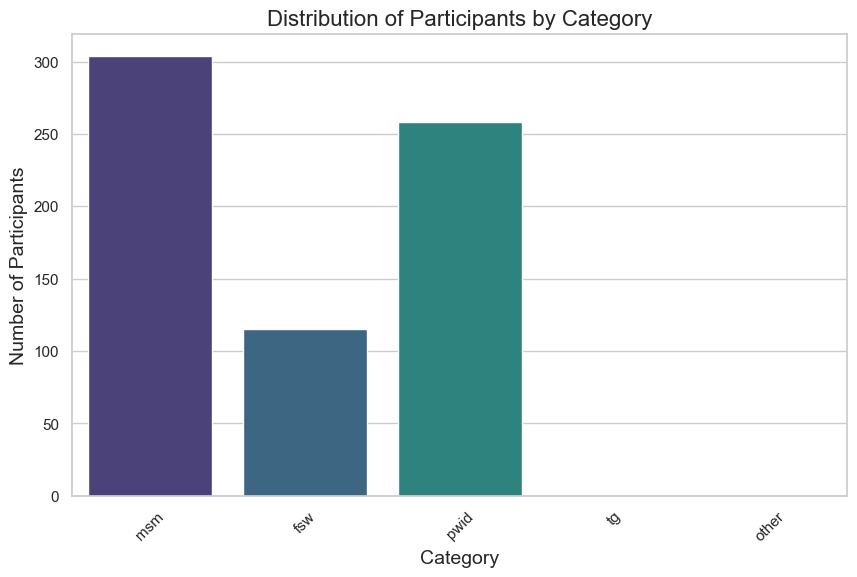

Distribution of client categories:
 msm  fsw  pwid  tg  other
1    0    0     0   0        304
0    0    1     0   0        258
     1    0     0   0        115
Name: count, dtype: int64


In [16]:
# Calculate category counts
categories = ['msm', 'fsw', 'pwid', 'tg', 'other']
category_counts = data[categories].sum()

# Create a bar plot for the category distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Distribution of Participants by Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Number of Participants', fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Display category distribution
print("Distribution of client categories:\n", category_distribution)


/var/folders/xn/n78p_dg163g3r82k7kzr779w0000gn/T/ipykernel_76682/1888099399.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_services_counts.index, y=missing_services_counts.values, palette='coolwarm')


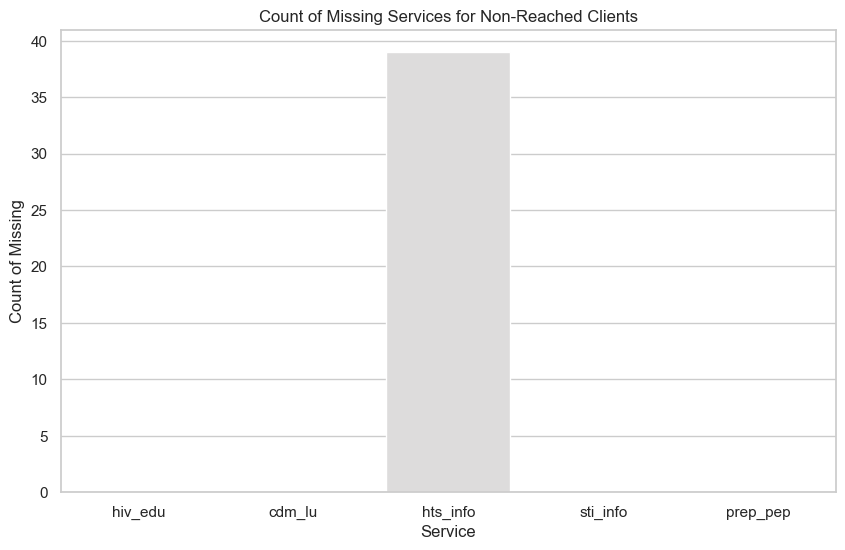

Missing services count:
 hiv_edu      0
cdm_lu       0
hts_info    39
sti_info     0
prep_pep     0
dtype: int64


In [18]:
# Identify clients not counted as prevention reach
clients_not_reached = data[~data[required_services].all(axis=1)]

# Analyze missing services
missing_services_counts = clients_not_reached[required_services].eq(0).sum()

# Plot missing services count
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_services_counts.index, y=missing_services_counts.values, palette='coolwarm')
plt.title('Count of Missing Services for Non-Reached Clients')
plt.xlabel('Service')
plt.ylabel('Count of Missing')
plt.show()

# Display missing services count
print("Missing services count:\n", missing_services_counts)


/var/folders/xn/n78p_dg163g3r82k7kzr779w0000gn/T/ipykernel_76682/245457797.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=service_coverage.index, y=service_coverage.values, palette='mako')


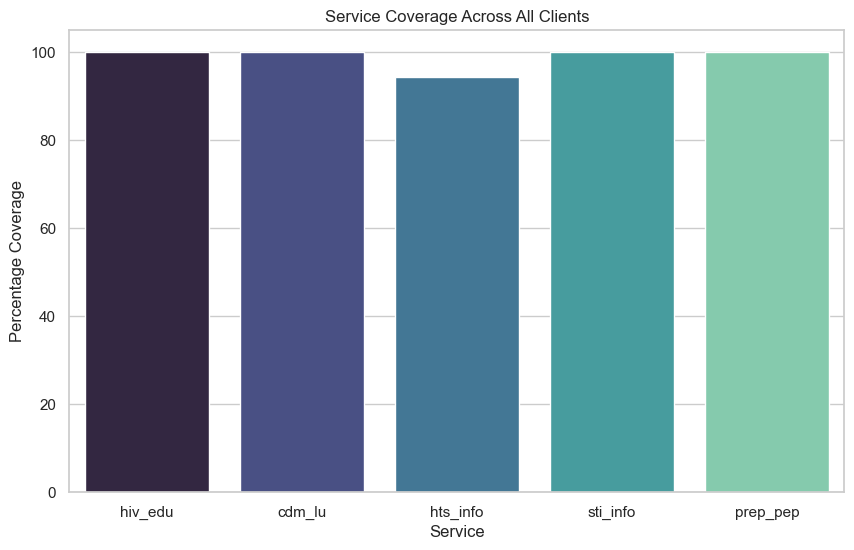

Service coverage percentage:
 hiv_edu     100.000000
cdm_lu      100.000000
hts_info     94.239291
sti_info    100.000000
prep_pep    100.000000
dtype: float64


In [19]:
#  Visualize service coverage
service_coverage = data[required_services].sum() / total_clients * 100

# Plot service coverage
plt.figure(figsize=(10, 6))
sns.barplot(x=service_coverage.index, y=service_coverage.values, palette='mako')
plt.title('Service Coverage Across All Clients')
plt.xlabel('Service')
plt.ylabel('Percentage Coverage')
plt.show()

# Display service coverage
print("Service coverage percentage:\n", service_coverage)


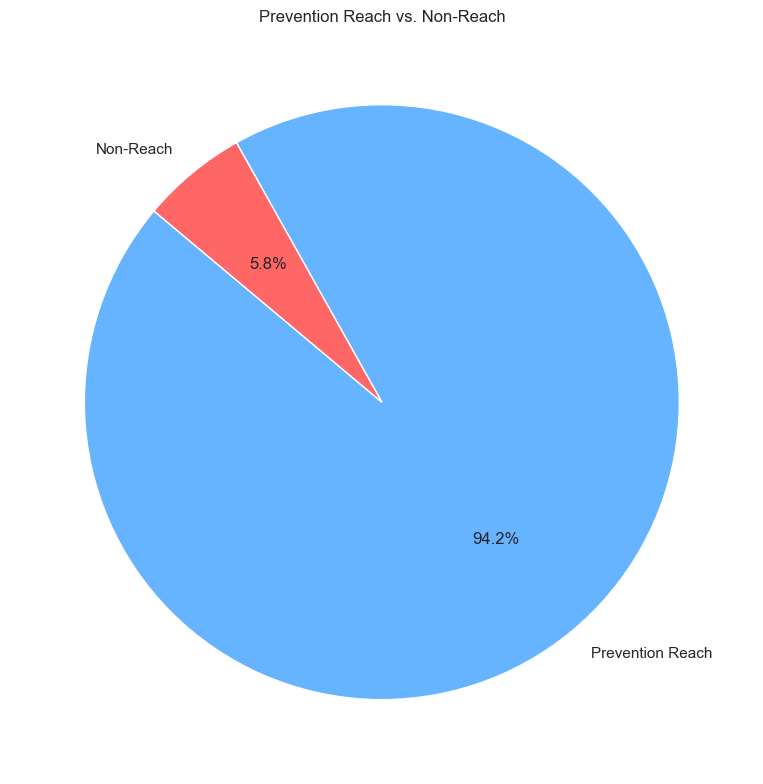

In [21]:
# Plot prevention reach vs. non-reach
prevention_reach_labels = ['Prevention Reach', 'Non-Reach']
prevention_reach_values = [prevention_reach_count, total_clients - prevention_reach_count]

plt.figure(figsize=(8, 8))
plt.pie(prevention_reach_values, labels=prevention_reach_labels, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#ff6666'])
plt.title('Prevention Reach vs. Non-Reach')
plt.tight_layout()
plt.show()


# Recommendations Based on Findings


## Key Findings
1. High Prevention Reach:
- Out of 677 participants in the dataset, 638 clients (approximately 94.2%) received all five key prevention services (HIV Education, Condom/Lubricant Use, HIV Testing Services, STI Information, and PrEP/PEP Information).

2. Distribution of Categories:

- The Men who have Sex with Men (MSM) group constitutes the largest segment, making up about 44.9% of the total participants.
- People Who Inject Drugs (PWID) follows with 38.1%.
- Female Sex Workers (FSW) account for 17%.
- Transgender (TG) and Other groups have 0% representation.

3. Comprehensive Service Coverage:

- Most participants received comprehensive prevention services, except for a small percentage who missed at least one service, primarily HIV Testing Services (HTS).

4. Missing Data for TG and Other Categories:

- The absence of data in TG and Other categories highlights potential gaps in outreach and data collection for these key populations.

# Recommendations
1. Strengthen HTS Outreach and Accessibility:

- Objective: Achieve 100% coverage in HIV Testing Services (HTS) to ensure no client is left behind in prevention reach.
- Actions:
    * Implement community-based HTS initiatives to bring services closer to underserved areas.
    * Develop partnerships with local health clinics to provide mobile testing services.
    * Conduct awareness campaigns to emphasize the importance of regular HIV testing.

2. Increase Engagement with Transgender and Other Key Populations:

- Objective: Ensure that the TG and Other categories are adequately represented and receive necessary prevention services.
- Actions:
    * Collaborate with transgender advocacy groups to design inclusive outreach programs.
    * Develop targeted educational materials that address the unique needs and concerns of these populations.
    * Organize focus groups to understand barriers to accessing services and develop strategies to overcome them.

3. Enhance Data Collection and Reporting:

- Objective: Improve the quality and comprehensiveness of data collection to better understand service delivery and client needs.
- Actions:
    * Implement digital data collection tools to ensure accurate and real-time reporting of service coverage.
    * Train field staff on the importance of comprehensive data capture, including detailed demographic information.
    * Conduct regular data audits to identify and address discrepancies in service delivery records.

4. Tailor Prevention Programs for High-Risk Groups:

- Objective: Develop specific interventions for MSM and PWID groups, who form the bulk of the client base.
- Actions:
    * Design culturally sensitive educational campaigns that resonate with the unique experiences of MSM and PWID.
    * Offer support groups and counseling services to address psychosocial challenges faced by these groups.
    * Provide harm reduction services, such as needle exchange programs, specifically targeting PWID populations.

5. Continuous Monitoring and Evaluation:

- Objective: Ensure the ongoing effectiveness and improvement of prevention programs through robust monitoring and evaluation practices.
- Actions:
    * Implement a feedback loop with clients to assess the quality and impact of services received.
    * Use data analytics to identify trends and patterns in prevention reach and adjust programs accordingly.
    * Set up regular review meetings with stakeholders to discuss program performance and explore new opportunities for service enhancement.

# Conclusion

The analysis indicates a commendable reach in delivering comprehensive prevention services to most clients. However, there are still areas requiring attention, particularly in achieving 100% HTS coverage and engaging TG and Other key populations. By addressing these gaps, the program can enhance its impact, ensuring that all clients receive the essential services they need for effective HIV prevention. Implementing these recommendations will not only improve service delivery but also contribute to broader public health goals, ultimately reducing the incidence of HIV within these high-risk populations.

# Data Visualization using one chart to cover all.

In [25]:
# Data
years = np.array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])
on_art = np.array([106490, 127402, 146826, 166969, 184624, 199345, 191588, 208480])
viral_load_tested = np.array([9700, 37575, 44048, 89760, 133468, 96911, 40682, 60260])
viral_load_suppressed = np.array([8421, 34678, 38861, 82306, 126167, 93034, 39461, 57763])

/var/folders/xn/n78p_dg163g3r82k7kzr779w0000gn/T/ipykernel_76682/833910919.py:18: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "g-s" (-> linestyle='-'). The keyword argument will take precedence.
  ax2.plot(years, viral_load_tested, 'g-s', label='Viral Load Tested', linestyle='--')
/var/folders/xn/n78p_dg163g3r82k7kzr779w0000gn/T/ipykernel_76682/833910919.py:19: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-d" (-> linestyle='-'). The keyword argument will take precedence.
  ax2.plot(years, viral_load_suppressed, 'r-d', label='Viral Load Suppressed', linestyle='--')
/var/folders/xn/n78p_dg163g3r82k7kzr779w0000gn/T/ipykernel_76682/833910919.py:26: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "m-x" (-> linestyle='-'). The keyword argument will take precedence.
  ax3.plot(years, viral_load_tested_among_art, 'm-x', label='V

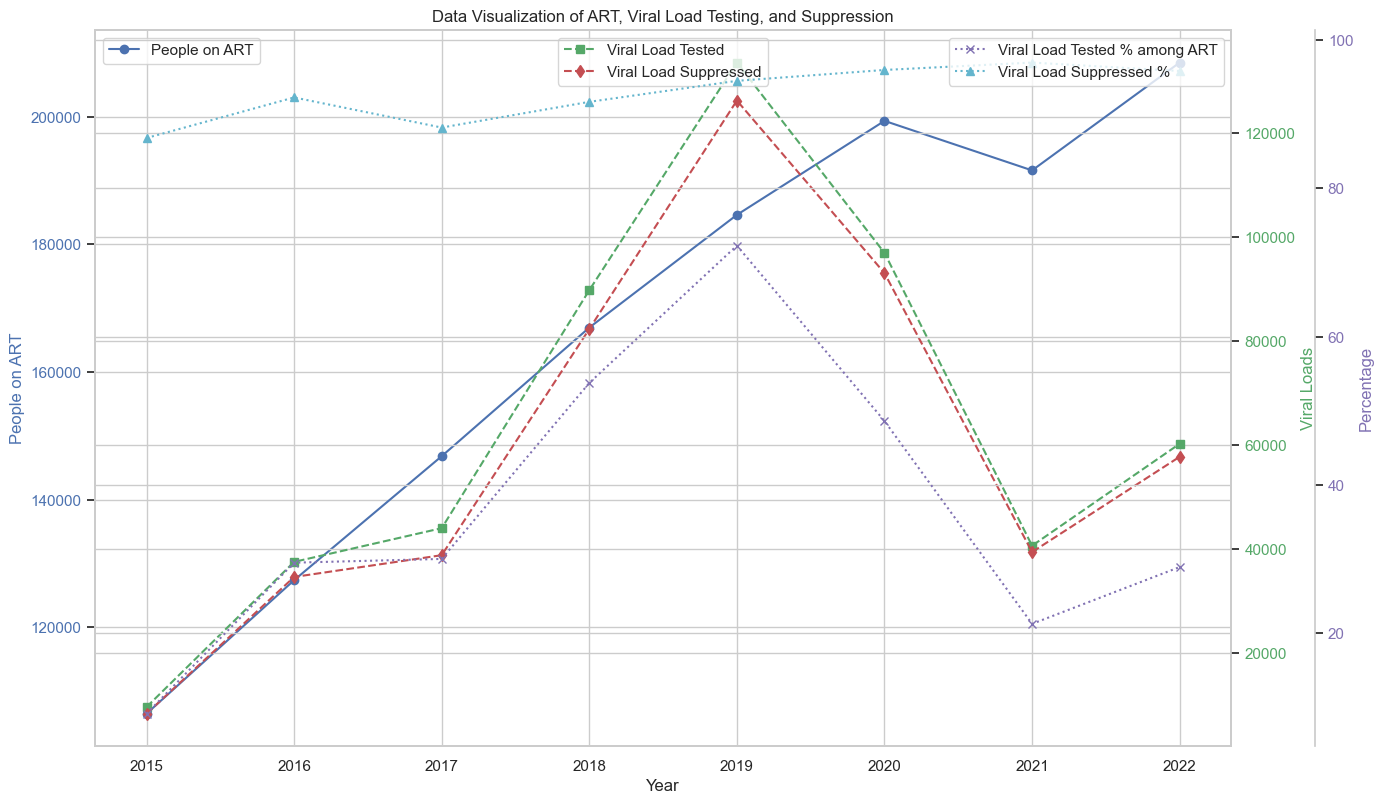

In [26]:
# Calculate viral load tested among those on ART
viral_load_tested_among_art = (viral_load_tested / on_art) * 100

# Calculate viral load suppressed percentage among those tested
percentage_suppressed = (viral_load_suppressed / viral_load_tested) * 100

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot on_art
ax1.plot(years, on_art, 'b-o', label='People on ART')
ax1.set_xlabel('Year')
ax1.set_ylabel('People on ART', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis to plot viral_load_tested and viral_load_suppressed
ax2 = ax1.twinx()
ax2.plot(years, viral_load_tested, 'g-s', label='Viral Load Tested', linestyle='--')
ax2.plot(years, viral_load_suppressed, 'r-d', label='Viral Load Suppressed', linestyle='--')
ax2.set_ylabel('Viral Loads', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Create a third y-axis for percentages (requires manual scaling)
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.plot(years, viral_load_tested_among_art, 'm-x', label='Viral Load Tested % among ART', linestyle=':')
ax3.plot(years, percentage_suppressed, 'c-^', label='Viral Load Suppressed %', linestyle=':')
ax3.set_ylabel('Percentage', color='m')
ax3.tick_params(axis='y', labelcolor='m')

# Adding legends and title
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper center')
ax3.legend(loc='upper right')

plt.title('Data Visualization of ART, Viral Load Testing, and Suppression')
plt.grid(True)
plt.show()

# Data Wrangling

In [36]:
# convert the existing wide format to a long format
file_path = '/Users/holmes/Desktop/icap/life_expectancy_dataset.xlsx'
df = pd.read_excel(file_path, header=0)
df_wide = pd.DataFrame(df)
# Set 'Year' as the index
print(df_wide.head())
df_wide.set_index('Country', inplace=True)

# Convert from wide to long format
df_long = df_wide.reset_index().melt(id_vars='Country',var_name='Year',value_name='Life Expectancy')

print(df_long)

               Country  2000  2001  2002  2003  2004  2005  2006  2007  2008  \
0          Afghanistan  54.8  55.3  56.2  56.7  57.0  57.3  57.3  57.5  58.1   
1              Albania  72.6  73.6  73.3  72.8  73.0  73.5  74.2  75.9  75.3   
2              Algeria  71.3  71.4  71.6  71.7  72.3  72.9  73.4  73.8  74.1   
3               Angola  45.3  45.7  46.5  46.8  47.1  47.4  47.7  48.2  48.7   
4  Antigua and Barbuda  73.6  73.8  74.0  74.2  74.4  74.6  74.8  75.0  75.2   

   2009  2010  2011  2012  2013  2014  2015  
0  58.6  58.8  59.2  59.5  59.9  59.9  65.0  
1  76.1  76.2  76.6  76.9  77.2  77.5  77.8  
2  74.4  74.7  74.9  75.1  75.3  75.4  75.6  
3  49.1  49.6  51.0  56.0  51.1  51.7  52.4  
4  75.4  75.6  75.7  75.9  76.1  76.2  76.4  
                                 Country  Year  Life Expectancy
0                            Afghanistan  2000             54.8
1                                Albania  2000             72.6
2                                Algeria  2000     

In [38]:
# Export to Excel
df_long.to_excel('long_format_life_expectancy.xlsx', index=False, engine='openpyxl')